In [22]:
%matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import scipy.stats as stats
import pymc as pm
import random
from pymc.Matplot import plot as mcplot

import pandas as pd

 [-----------------100%-----------------] 20000 of 20000 complete in 1.6 secPlotting n_pos1
Plotting p_pos


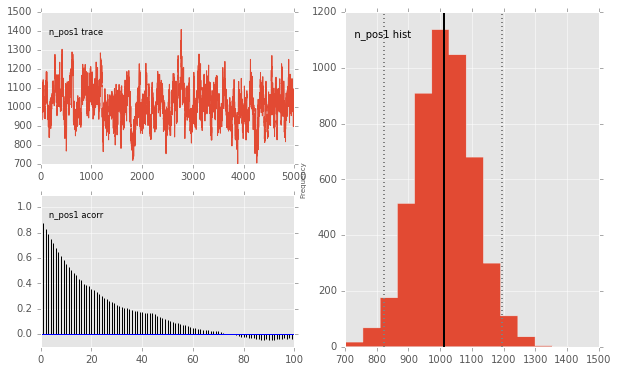

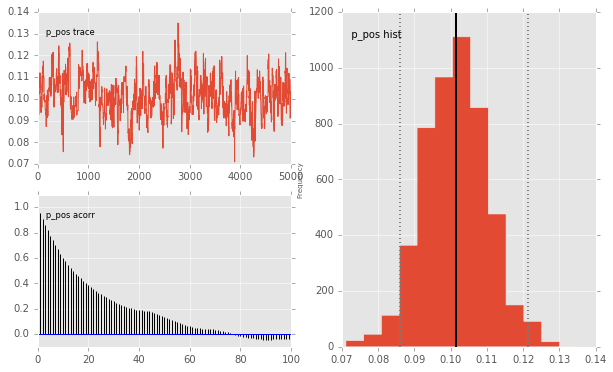

In [13]:
n0    =  1000
pos0  =   100
n1    = 10000
pos1  =  5800

p_p     = pm.Uniform("p_pos", 0., 1.)

n_pos0  = pm.Binomial("n_pos0", n=n0, p=p_p, value=pos0, observed=True)
n_pos1  = pm.Binomial("n_pos1", n=n1, p=p_p)

mcmc = pm.MCMC([n_pos0, n_pos1, p_p])
mcmc.sample(20000, 10000, thin=2)

mcplot(mcmc)

In [14]:
np.percentile(mcmc.trace("n_pos1")[:], [1, 5, 50, 95, 99])

array([  784.98,   862.  ,  1013.  ,  1170.  ,  1237.  ])

In [15]:
mcmc.trace("n_pos1")[:].std(), mcmc.trace("n_pos1")[:].std() / mcmc.trace("n_pos1")[:].mean()

(93.723521599222892, 0.092549512522966559)

In [16]:
def traces_for_pos1(n0, pos0, n1, n_iter = 20000, n_burnin = 4000, thin = 2):
    
    p_p     = pm.Uniform("p_pos", 0., 1.)

    n_pos0  = pm.Binomial("n_pos0", n=n0, p=p_p, value=pos0, observed=True)
    n_pos1  = pm.Binomial("n_pos1", n=n1, p=p_p)

    mcmc = pm.MCMC([n_pos0, n_pos1, p_p])
    mcmc.sample(n_iter, n_burnin, thin=thin, progress_bar=False)

    return mcmc.trace("n_pos1")[:]

In [17]:
t = traces_for_pos1(100, 10, 1000)
np.percentile(t, [1, 5, 50, 95, 99]), np.std(t), t.std() / t.mean()

(array([  48.,   61.,  104.,  165.,  189.]),
 31.514909954456478,
 0.29278949758754769)

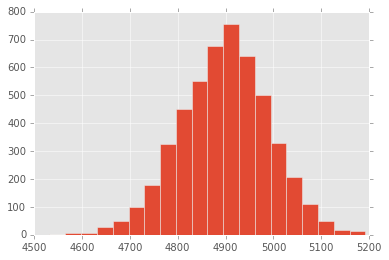

In [24]:
t = traces_for_pos1(1000, 100, 10000, n_iter=30000, n_burnin=10000, thin=4)
resid = 5900 - t

_ = plt.hist(resid, bins=20)

In [29]:
pd.Series(resid).describe(percentiles=[0.01, 0.05, 0.10, 0.50, 0.90, 0.95, 0.99])

count    5000.000000
mean     4896.988200
std        93.105957
min      4532.000000
1%       4669.990000
5%       4743.000000
10%      4777.000000
50%      4900.000000
90%      5013.000000
95%      5048.050000
99%      5108.010000
max      5192.000000
dtype: float64

In [43]:
n_tirages=10

p = pm.Uniform("p", 0., 1.)
tirage = pm.Binomial("tirage", n=n_tirages, p=p, value=n_tirages, observed=10)
next_tirage = pm.Bernoulli("next_tirage", p=1-p)

mcmc = pm.MCMC([p, tirage, next_tirage])
mcmc.sample(20000, 10000, thin=4)

 [-----------------100%-----------------] 20000 of 20000 complete in 1.4 sec

In [44]:
next_trace = mcmc.trace("next_tirage")[:]
next_trace.mean()

0.081600000000000006